In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./dados/base_rf.csv")

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

## Substituindo a variável resposta por número

In [5]:
df.loc[:,"y"] = df["y"].replace("no", 0).replace("yes",1)

In [6]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


## E nas variáveis preditivas:

LabelEncoder \
OneHotEnconding ou Dummy

e várias outras formas

In [8]:
df.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

### Separando em treino e teste

In [9]:
X = df.drop(columns="y", axis=1)
y = df.y

In [11]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, random_state=61658, test_size=0.30)

In [13]:
X_treino.shape, X_teste.shape

((28831, 19), (12357, 19))

### Conversão da coluna para número

Vamos usar a Ordinal Encoder

Para não perdermos rastreabilidade, vamos criar um Encoder para cada coluna

In [14]:
X_treino.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [17]:
from sklearn.preprocessing import OrdinalEncoder

X_treino_o = X_treino.copy()
X_teste_o  = X_teste.copy()

enconders = {}
for col, dtype in X_treino_o.dtypes.items():
    
    if dtype=="object":
        
        enconders[col] = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
        X_treino_o.loc[:,col] = enconders[col].fit_transform(X_treino_o[[col]])
        X_teste_o.loc[:,col]  = enconders[col].transform(X_teste_o[[col]])

    
X_treino_o

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12762,48,1.0,1.0,1.0,1.0,2.0,0.0,0.0,3.0,3.0,1,999,0,1.0,1.4,93.918,-42.7,4.962,5228.1
8278,37,4.0,1.0,6.0,0.0,0.0,0.0,1.0,4.0,3.0,1,999,0,1.0,1.4,94.465,-41.8,4.864,5228.1
24236,31,7.0,0.0,3.0,0.0,2.0,2.0,0.0,7.0,1.0,1,999,0,1.0,-0.1,93.200,-42.0,4.191,5195.8
6284,48,4.0,0.0,6.0,0.0,2.0,0.0,1.0,6.0,3.0,5,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0
40785,32,9.0,1.0,2.0,0.0,0.0,0.0,0.0,9.0,4.0,1,6,5,2.0,-1.1,94.199,-37.5,0.879,4963.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38020,78,11.0,1.0,7.0,0.0,2.0,0.0,0.0,9.0,4.0,1,999,1,0.0,-3.4,92.379,-29.8,0.781,5017.5
4392,46,1.0,1.0,5.0,1.0,0.0,2.0,1.0,6.0,3.0,2,999,0,1.0,1.1,93.994,-36.4,4.856,5191.0
40543,19,8.0,2.0,3.0,0.0,1.0,1.0,0.0,1.0,3.0,1,999,0,1.0,-1.7,94.027,-38.3,0.886,4991.6
28760,27,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,2,999,1,0.0,-1.8,93.075,-47.1,1.410,5099.1


In [18]:
X_treino_o.pdays.value_counts()

999    27750
3        314
6        295
4         84
7         46
9         44
12        42
2         41
10        38
5         29
13        28
15        22
1         19
11        17
0         12
14        12
8         11
16         8
17         6
19         3
18         3
22         2
21         1
20         1
25         1
26         1
27         1
Name: pdays, dtype: int64

## Vamos direto para a Random Forest:

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [20]:
params = {
 
    'criterion'   : ["gini", "entropy"],
    'max_depth'   : [3,5,7,9,11],
    #'class_weight': [None, "balanced"], 

}

rf = GridSearchCV(
    RandomForestClassifier(n_estimators=500, random_state=61658, n_jobs=2),
    params,
    cv=5,
    scoring="roc_auc",
    verbose=10    
)

In [22]:
%%time

rf.fit(X_treino_o, y_treino)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START criterion=gini, max_depth=3................................
[CV 1/5; 1/10] END ..............criterion=gini, max_depth=3; total time=   2.7s
[CV 2/5; 1/10] START criterion=gini, max_depth=3................................
[CV 2/5; 1/10] END ..............criterion=gini, max_depth=3; total time=   1.9s
[CV 3/5; 1/10] START criterion=gini, max_depth=3................................
[CV 3/5; 1/10] END ..............criterion=gini, max_depth=3; total time=   1.8s
[CV 4/5; 1/10] START criterion=gini, max_depth=3................................
[CV 4/5; 1/10] END ..............criterion=gini, max_depth=3; total time=   1.9s
[CV 5/5; 1/10] START criterion=gini, max_depth=3................................
[CV 5/5; 1/10] END ..............criterion=gini, max_depth=3; total time=   2.4s
[CV 1/5; 2/10] START criterion=gini, max_depth=5................................
[CV 1/5; 2/10] END ..............criterion=gini,

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=500, n_jobs=2,
                                              random_state=61658),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11]},
             scoring='roc_auc', verbose=10)

In [23]:
rf.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [24]:
params = {
 
    'criterion'   : ["gini", "entropy"],
    'max_depth'   : [3,5,7,9,11],
    'class_weight': [None, "balanced"], 

}

rf = GridSearchCV(
    RandomForestClassifier(n_estimators=500, random_state=61658, n_jobs=2),
    params,
    cv=5,
    scoring="roc_auc",
    verbose=10    
)

In [25]:
%%time

rf.fit(X_treino_o, y_treino)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START class_weight=None, criterion=gini, max_depth=3.............
[CV 1/5; 1/20] END class_weight=None, criterion=gini, max_depth=3; total time=   1.9s
[CV 2/5; 1/20] START class_weight=None, criterion=gini, max_depth=3.............
[CV 2/5; 1/20] END class_weight=None, criterion=gini, max_depth=3; total time=   1.8s
[CV 3/5; 1/20] START class_weight=None, criterion=gini, max_depth=3.............
[CV 3/5; 1/20] END class_weight=None, criterion=gini, max_depth=3; total time=   1.7s
[CV 4/5; 1/20] START class_weight=None, criterion=gini, max_depth=3.............
[CV 4/5; 1/20] END class_weight=None, criterion=gini, max_depth=3; total time=   1.7s
[CV 5/5; 1/20] START class_weight=None, criterion=gini, max_depth=3.............
[CV 5/5; 1/20] END class_weight=None, criterion=gini, max_depth=3; total time=   1.8s
[CV 1/5; 2/20] START class_weight=None, criterion=gini, max_depth=5.............
[CV 1/5; 2/20] END cla

[CV 4/5; 10/20] END class_weight=None, criterion=entropy, max_depth=11; total time=   3.3s
[CV 5/5; 10/20] START class_weight=None, criterion=entropy, max_depth=11........
[CV 5/5; 10/20] END class_weight=None, criterion=entropy, max_depth=11; total time=   3.3s
[CV 1/5; 11/20] START class_weight=balanced, criterion=gini, max_depth=3........
[CV 1/5; 11/20] END class_weight=balanced, criterion=gini, max_depth=3; total time=   1.7s
[CV 2/5; 11/20] START class_weight=balanced, criterion=gini, max_depth=3........
[CV 2/5; 11/20] END class_weight=balanced, criterion=gini, max_depth=3; total time=   1.7s
[CV 3/5; 11/20] START class_weight=balanced, criterion=gini, max_depth=3........
[CV 3/5; 11/20] END class_weight=balanced, criterion=gini, max_depth=3; total time=   1.7s
[CV 4/5; 11/20] START class_weight=balanced, criterion=gini, max_depth=3........
[CV 4/5; 11/20] END class_weight=balanced, criterion=gini, max_depth=3; total time=   1.8s
[CV 5/5; 11/20] START class_weight=balanced, crit

[CV 2/5; 20/20] END class_weight=balanced, criterion=entropy, max_depth=11; total time=   3.4s
[CV 3/5; 20/20] START class_weight=balanced, criterion=entropy, max_depth=11....
[CV 3/5; 20/20] END class_weight=balanced, criterion=entropy, max_depth=11; total time=   3.3s
[CV 4/5; 20/20] START class_weight=balanced, criterion=entropy, max_depth=11....
[CV 4/5; 20/20] END class_weight=balanced, criterion=entropy, max_depth=11; total time=   3.3s
[CV 5/5; 20/20] START class_weight=balanced, criterion=entropy, max_depth=11....
[CV 5/5; 20/20] END class_weight=balanced, criterion=entropy, max_depth=11; total time=   3.3s
CPU times: user 1min 6s, sys: 4.35 s, total: 1min 10s
Wall time: 4min 13s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=500, n_jobs=2,
                                              random_state=61658),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11]},
             scoring='roc_auc', verbose=10)

In [26]:
rf.best_params_

{'class_weight': None, 'criterion': 'entropy', 'max_depth': 11}

In [27]:
from sklearn.metrics import roc_auc_score

preds = rf.predict_proba(X_teste_o)[:,1]

roc_auc_score(y_teste, preds)

0.7966590195876495

In [28]:
rf.best_estimator_.feature_importances_

array([0.07663135, 0.03800392, 0.01941419, 0.03496639, 0.00970932,
       0.01478325, 0.01268279, 0.0232011 , 0.03703465, 0.03593807,
       0.03858957, 0.06317601, 0.01836405, 0.05617932, 0.0867995 ,
       0.04404445, 0.05228833, 0.17407735, 0.1641164 ])

In [30]:
imps  = rf.best_estimator_.feature_importances_
cols  = X_treino_o.columns
order = np.argsort(imps)[::-1] ##argsort ordena do menor para o maior, e [::-1] inverte

for col,imp in zip(cols[order], imps[order]):
    print(f'{col:30s} {imp:.2f}')

euribor3m                      0.17
nr.employed                    0.16
emp.var.rate                   0.09
age                            0.08
pdays                          0.06
poutcome                       0.06
cons.conf.idx                  0.05
cons.price.idx                 0.04
campaign                       0.04
job                            0.04
month                          0.04
day_of_week                    0.04
education                      0.03
contact                        0.02
marital                        0.02
previous                       0.02
housing                        0.01
loan                           0.01
default                        0.01


In [31]:
preds.min()

0.009869562978628054

In [32]:
preds.max()

0.9192108531949466

Uma característica, um viés, da Random Forest, é de não termos valores extremos: 0 e 1 

Os scores acabam se dispersando melhor do que na árvore de decisão sozinha. \
Por ser um método de votação, acabamos por não termos valores extremos.

### Vamos verificar isso:

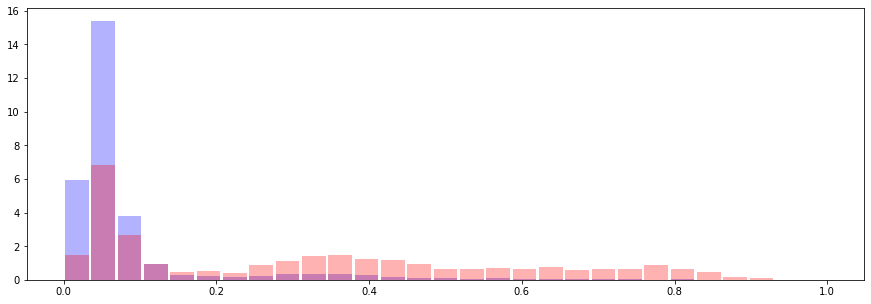

In [33]:
plt.figure(figsize=(15,5))

plt.hist(preds[y_teste==0], bins=np.linspace(0,1,30), density=True, color='b', alpha=.3, rwidth=.9)
plt.hist(preds[y_teste==1], bins=np.linspace(0,1,30), density=True, color='r', alpha=.3, rwidth=.9)

plt.show()

In [34]:
preds.min(), preds.max()

(0.009869562978628054, 0.9192108531949466)